# Modelos de Classificação

Nosso objetivo é criar modelos de classificação com dados fictícios.

Importando as bibliotecas de analise e visualização de dados

In [1]:
from sklearn.model_selection import cross_val_predict
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Carregando a base de dados

In [3]:
dfPoints = pd.read_csv("df_points.txt", delimiter="\t")

## Análise Explanatória de Dados 

Verificando os atributos

In [3]:
dfPoints.head()

,Unnamed: 0,x,y,z,label
0,0,326.488285,188.988808,-312.205307,0.0
1,1,-314.287214,307.276723,-179.037412,1.0
2,2,-328.208910,181.627758,446.311062,1.0
3,3,-148.658890,147.027947,-27.477959,1.0
4,4,-467.065931,250.467651,-306.475330,1.0


In [4]:
dfPoints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   x           10000 non-null  float64
 2   y           10000 non-null  float64
 3   z           10000 non-null  float64
 4   label       10000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 390.8 KB


In [5]:
dfPoints[['x','y','z']].describe()

,x,y,z
count,10000.000000,10000.000000,10000.000000
mean,0.850362,-3.108769,-2.601124
std,288.379928,287.120263,290.379789
min,-499.802348,-499.899134,-499.952571
25%,-249.199895,-248.954580,-258.005693
50%,3.663472,-5.446168,-8.221000
75%,248.879970,244.395864,252.930406
max,499.872453,499.752418,499.872329


A coluna Unnamed:0 pode ser eliminada pois não tem importância para a análise. Vamos eliminá-la

In [6]:
dfPoints.drop('Unnamed: 0', axis=1, inplace=True)
dfPoints.head()

,x,y,z,label
0,326.488285,188.988808,-312.205307,0.0
1,-314.287214,307.276723,-179.037412,1.0
2,-328.208910,181.627758,446.311062,1.0
3,-148.658890,147.027947,-27.477959,1.0
4,-467.065931,250.467651,-306.475330,1.0


Criando um parplot com o matiz definido pelo recurso de coluna 'label'

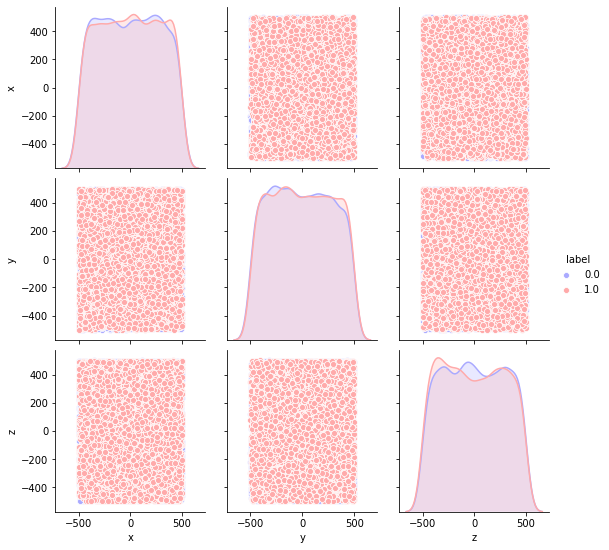

In [7]:
sns.pairplot(dfPoints,hue='label',palette='bwr')

As classes tendem a ter a mesma distribuição em cada característica.
Vemos também que o nosso dataset não possue dados faltantes.

## Usando o Modelo de Regressão Logística

Vamos começar dividindo nossos dados em um conjunto de treinamento e conjunto de testes.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfPoints.drop('label',axis=1),dfPoints['label'],test_size=0.2)

Verificando a forma dos dados

In [9]:
X_train.shape,X_test.shape

((8000, 3), (2000, 3))

In [10]:
y_train.shape,y_test.shape

((8000,), (2000,))

Instânciando o Algoritmo de Regressão Logística

In [11]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

Treinando o Algoritmo

In [12]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Executando a Regressão Logístiva com o conjunto de teste

In [13]:
predictionslg = logmodel.predict(X_test)

#os resultados das predições serão
predictionslg

array([1., 1., 0., ..., 1., 1., 0.])

Vamos as Técnicas de Validação

In [14]:
#Matriz de confusão
print (pd.crosstab(y_test,predictionslg, rownames=['Real'], colnames=['          Predito'], margins=True))

          Predito  0.0   1.0   All
Real                              
0.0                483   517  1000
1.0                369   631  1000
All                852  1148  2000


In [15]:
# pela matriz de confusão vemos que o modelo se saiu mal para classificar a classe 0.

In [16]:
#Métricas de Classificação
from sklearn import metrics
print(metrics.classification_report(y_test,predictionslg))

              precision    recall  f1-score   support

         0.0       0.57      0.48      0.52      1000
         1.0       0.55      0.63      0.59      1000

   micro avg       0.56      0.56      0.56      2000
   macro avg       0.56      0.56      0.55      2000
weighted avg       0.56      0.56      0.55      2000



In [17]:
#Validação Cruzada
from sklearn.model_selection import cross_val_score
def Acuracia(clf,X,y):
    resultados = cross_val_predict(clf, X, y, cv=5)
    return metrics.accuracy_score(y,resultados)

Acuracia(logmodel,dfPoints[['x','y','z']],dfPoints['label'])

0.5579

### Otimizando o valor do parâmetro C

In [18]:
# Importando o GridSearch
from sklearn.model_selection import GridSearchCV

In [19]:
# Definindo a lista de valores para o parâmetro 
c_list = [0.01,0.1,1.0,1.01,1.1,2]
c_values = dict(C=c_list)
c_values

{'C': [0.01, 0.1, 1.0, 1.01, 1.1, 2]}

In [20]:
# Instânciando o objeto GridSearch
grid = GridSearchCV(logmodel, c_values, cv=5, scoring='accuracy')

In [21]:
# Treinando o objeto
grid.fit(dfPoints.drop('label',axis=1),dfPoints['label'])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1.0, 1.01, 1.1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [22]:
#Visualizando os valores de scores
print("Melhor valor de k = {} com o valor {} de acurácia".format(grid.best_params_,grid.best_score_))

Melhor valor de k = {'C': 0.01} com o valor 0.5585 de acurácia


In [23]:
# Visualização dos valores de C e acurácia

#imprindo os scores por combinações 
results = grid.cv_results_
means = results['mean_test_score']
stds = results['std_test_score']
scores=[]
for mean,std,params in zip(means,stds,results['params']):
    print("%0.3f(+/-%0.03f) for %r"%(mean,std*2,params))
    scores.append(mean)

0.558(+/-0.023) for {'C': 0.01}
0.558(+/-0.021) for {'C': 0.1}
0.558(+/-0.021) for {'C': 1.0}
0.558(+/-0.021) for {'C': 1.01}
0.558(+/-0.021) for {'C': 1.1}
0.558(+/-0.021) for {'C': 2}


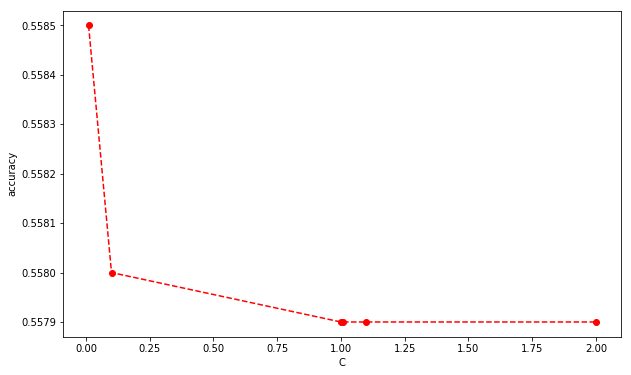

In [24]:
#plotando os resultados acuracia com a lista de C's
plt.figure(figsize=(10,6))
plt.plot(c_list,scores,color='red',linestyle='dashed',marker='o')
plt.xlabel('C')
plt.ylabel('accuracy')
plt.show()

In [25]:
#Repetindo os processos de treino e teste, agora com C=0.01
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(C=0.01)

#treino
logmodel.fit(X_train,y_train)

#teste
predictionslogmodel = logmodel.predict(X_test)

#resultados
predictionslogmodel

array([1., 1., 0., ..., 1., 1., 0.])

In [26]:
#Avaliando o modelo por Métricas de Classificação
from sklearn import metrics
print(metrics.classification_report(y_test,predictionslogmodel))

              precision    recall  f1-score   support

         0.0       0.57      0.49      0.52      1000
         1.0       0.55      0.63      0.59      1000

   micro avg       0.56      0.56      0.56      2000
   macro avg       0.56      0.56      0.55      2000
weighted avg       0.56      0.56      0.55      2000



### Teste de Overfitting para Regressão Logística

In [27]:
#Resultados de predição
y_p = logmodel.predict(X_test)

#Acurácia
metrics.accuracy_score(y_test,y_p)

0.5565

In [28]:
#Testando a classificação com os próprios valores de treino

#Resultados de predição
y_p = logmodel.predict(X_train)

#Acurácia
metrics.accuracy_score(y_train,y_p)

0.556875

O modelo de regressão logística não possui overffiting, entretanto, ele se saiu mal para fazer a classificação. Vamos aplicar outro modelo e ver conseguimos um resultado melhor.

## Usando o Modelo KNN (K vizinhos próximos)

Vamos começar dividindo nossos dados em um conjunto de treinamento e conjunto de testes.

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfPoints.drop('label',axis=1),dfPoints['label'],test_size=0.2,random_state=5)

Verificando a forma dos dados

In [84]:
X_train.shape,X_test.shape

((8000, 3), (2000, 3))

In [85]:
y_train.shape,y_test.shape

((8000,), (2000,))

Instânciando o Algoritmo de KNN

In [88]:
#Utilizando como teste o número de k = 3
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

Treinando o Algoritmo

In [89]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

Executando a Regressão Logístiva com o conjunto de teste

In [96]:
predictionsknn = knn.predict(X_test)

#resultados
predictionknn

array([0., 0., 0., ..., 1., 1., 0.])

Vamos as Técnicas de Validação

In [97]:
#Matriz de confusão
print (pd.crosstab(y_test,predictionsknn, rownames=['Real'], colnames=['          Predito'], margins=True))

          Predito   0.0  1.0   All
Real                              
0.0                 732  285  1017
1.0                 275  708   983
All                1007  993  2000


In [99]:
#Métricas de Classificação
from sklearn import metrics
print(metrics.classification_report(y_test,predictionsknn))

              precision    recall  f1-score   support

         0.0       0.73      0.72      0.72      1017
         1.0       0.71      0.72      0.72       983

   micro avg       0.72      0.72      0.72      2000
   macro avg       0.72      0.72      0.72      2000
weighted avg       0.72      0.72      0.72      2000



In [110]:
#Validação Cruzada
from sklearn.model_selection import cross_val_score
def Acuracia(clf,X,y):
    resultados = cross_val_predict(clf, X, y, cv=10)
    return metrics.accuracy_score(y,resultados)

Acuracia(knn,dfPoints[['x','y','z']],dfPoints['label'])

0.723

In [105]:
#o melhor valor de acuracia, usando k = 3, e de 72.3 %. Vamos otimizar o valor de k.

### Otimizando o valor de K

In [106]:
# Importando o GridSearch
from sklearn.model_selection import GridSearchCV

In [117]:
# Definindo a lista de valores para o parâmetro 
k_list = list(range(1,41))
k_values = dict(n_neighbors=k_list)
k_values

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40]}

In [118]:
# Instânciando o objeto GridSearch
grid = GridSearchCV(knn, k_values, cv=5, scoring='accuracy')

In [119]:
# Treinando o objeto
grid.fit(dfPoints.drop('label',axis=1),dfPoints['label'])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [120]:
#Visualizando os valores de scores
print("Melhor valor de k = {} com o valor {} de acurácia".format(grid.best_params_,grid.best_score_))

Melhor valor de k = {'n_neighbors': 40} com o valor 0.7707 de acurácia


In [121]:
# Visualização dos valores de K e acurácia

#imprindo os scores por combinações 
results = grid.cv_results_
means = results['mean_test_score']
stds = results['std_test_score']
scores=[]
for mean,std,params in zip(means,stds,results['params']):
    print("%0.3f(+/-%0.03f) for %r"%(mean,std*2,params))
    scores.append(mean)

0.681(+/-0.020) for {'n_neighbors': 1}
0.671(+/-0.024) for {'n_neighbors': 2}
0.720(+/-0.017) for {'n_neighbors': 3}
0.721(+/-0.019) for {'n_neighbors': 4}
0.740(+/-0.012) for {'n_neighbors': 5}
0.741(+/-0.014) for {'n_neighbors': 6}
0.749(+/-0.013) for {'n_neighbors': 7}
0.749(+/-0.019) for {'n_neighbors': 8}
0.758(+/-0.013) for {'n_neighbors': 9}
0.756(+/-0.015) for {'n_neighbors': 10}
0.759(+/-0.014) for {'n_neighbors': 11}
0.759(+/-0.013) for {'n_neighbors': 12}
0.764(+/-0.011) for {'n_neighbors': 13}
0.763(+/-0.010) for {'n_neighbors': 14}
0.766(+/-0.013) for {'n_neighbors': 15}
0.763(+/-0.012) for {'n_neighbors': 16}
0.765(+/-0.011) for {'n_neighbors': 17}
0.764(+/-0.013) for {'n_neighbors': 18}
0.766(+/-0.009) for {'n_neighbors': 19}
0.767(+/-0.013) for {'n_neighbors': 20}
0.766(+/-0.014) for {'n_neighbors': 21}
0.764(+/-0.014) for {'n_neighbors': 22}
0.767(+/-0.013) for {'n_neighbors': 23}
0.766(+/-0.010) for {'n_neighbors': 24}
0.768(+/-0.010) for {'n_neighbors': 25}
0.767(+/-

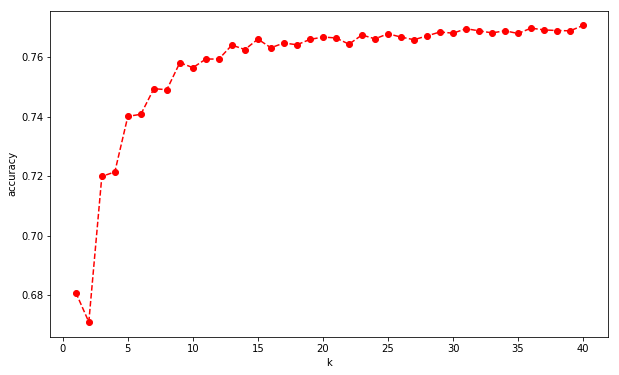

In [122]:
#plotando os resultados acuracia com a lista de k's
plt.figure(figsize=(10,6))
plt.plot(k_list,scores,color='red',linestyle='dashed',marker='o')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

A partir de K = 13 vemos que a acurácia se estabilizou em mais ou menos 76.5%.
Vamos escolher o valor de K = 30 para nosso modelo final.

In [123]:
#Repetindo os processos de treino e teste, agora com K=30
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=30)

#treino
knn.fit(X_train,y_train)

#teste
predictionsknn = knn.predict(X_test)

#resultados
predictionknn

array([0., 0., 0., ..., 1., 1., 0.])

In [124]:
#Avaliando o modelo por Métricas de Classificação
from sklearn import metrics
print(metrics.classification_report(y_test,predictionsknn))

              precision    recall  f1-score   support

         0.0       0.76      0.79      0.77      1017
         1.0       0.77      0.75      0.76       983

   micro avg       0.77      0.77      0.77      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.77      0.77      0.77      2000



### Teste de Overfitting para KNN

Vamos utilizar os X_train e X_test em predictionsknn para avaliar se existe overffiting dado K = 30

In [125]:
#Resultados de predição
y_p = knn.predict(X_test)

#Acurácia
metrics.accuracy_score(y_test,y_p)

0.7675

In [126]:
#Testando a classificação com os próprios valores de treino

#Resultados de predição
y_p = knn.predict(X_train)

#Acurácia
metrics.accuracy_score(y_train,y_p)

0.779625

Desta forma, vemos que nosso algorítmo de KNN, com K = 30, não está sofrendo de overffiting, pois a acurácia vinda dos dados de treino (que naturalmente é maior) e a acurácia vinda dos dados de teste não se diferenciam muito.

Portando, percebe-se que o modelo de KNN pode ser usado com mais confiança para classificação do que o modelo de Regressão Logística.